<a href="https://colab.research.google.com/github/josorio398/Hyperspectral_Images_Analysis/blob/main/Hyperspectral_Images_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hyperspectal Images Analysis**

###  **Libraries**

**Spectral-libraries** The Spectral Library Tool software package is both a QGIS plugin and stand-alone python package that provides a suite of processing tools for multi- and hyperspectral spectral libraries.

The software is based on VIPER Tools: code written for ENVI/IDL and released in 2007. Several updates have been released since and now it has been ported to PyQGIS in the period 2017 - 2020. The original VIPER Tools is now split over two python/QGIS tools: Spectral Library Tools and MESMA.

**Matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

**Numpy**  is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

**Pandas** is a software library written for the Python programming language for data manipulation and analysis.In particular, it offers data structures and operations for manipulating numerical tables and time series.

In [ ]:
import spectral.io.envi as envi
import numpy as np
import pandas as pd
import wget
import os
import matplotlib.pyplot as plt

###  **Downloading files from the repository**

The files downloaded from github repository: https://github.com/josorio398/Hyperspectral_Images_Analysis

In [19]:
path_hdr = "hojas.hdr"
path_raw = "hojas.raw"

if os.path.exists(path_hdr) == False and os.path.exists(path_raw) == False:
    wget.download("https://raw.githubusercontent.com/josorio398/Hyperspectral_Images_Analysis/main/hojas.hdr")
    wget.download("https://raw.githubusercontent.com/josorio398/Hyperspectral_Images_Analysis/main/hojas.raw")

###    **Image characteristics**

Characteristics of the image contained in the ENVI file.

In [20]:
h = envi.read_envi_header(path_hdr)
h

{'file type': 'ENVI Standard',
 'sensor type': 'MONARCH',
 'wavelength units': 'nm',
 'data type': '12',
 'interleave': 'BSQ',
 'byte order': '0',
 'bit depth': '10',
 'header offset': '0',
 'wavelength': ['713',
  '736',
  '759',
  '782',
  '805',
  '828',
  '851',
  '874',
  '897',
  '920'],
 'gain': ['1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0'],
 'exposure time': ['66', '66', '66', '66', '66', '66', '66', '66', '66', '66'],
 'exposure type': ['radiometric-calibration'],
 'default bands': ['713'],
 'lines': '1024',
 'samples': '1280',
 'bands': '10'}

###  **Extract images**

Extract the images from the hdrm and raw file. 

In [ ]:
wavelength  = h["wavelength"]

images = []

for i in wavelength:
    globals()["img_"+i] = envi.open(path_hdr,path_raw).read_band(wavelength.index(i))
    images.append("img_"+i)

###   **Show images**

The images are presented for each wavelength.

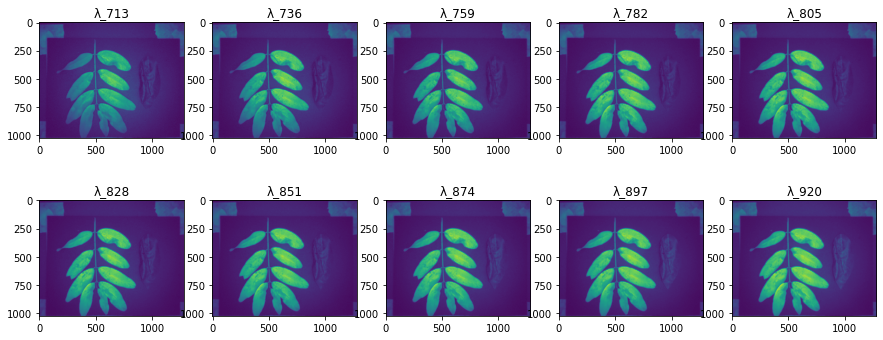

In [ ]:
rows = 2
cols = 5

fig, axs = plt.subplots(rows, cols, figsize=(15, 6))

L_rows = cols*[0] + cols*[1]
L_cols = rows*list(range(cols))

for img in images :
    axs[L_rows[images.index(img)],L_cols[images.index(img)]].imshow(eval(img))
    axs[L_rows[images.index(img)],L_cols[images.index(img)]].set_title("λ"+img[3:])

###   **Unfolding**

Hyperspectral data files are usually called hypercubes due to the three-dimensional structure of their data.
However, many of the useful and established chemometric algorithms are designed to be performed on two-dimensional matrices rather than three-dimensional hypercubes.

In [ ]:
array_data = []

for  img in images:
    col = eval(img).flatten()
    array_data.append(col)

data = np.stack(array_data, axis=1)
df = pd.DataFrame(data).set_axis(wavelength, axis=1)
df

,713,736,759,782,805,828,851,874,897,920
0,1,2,2,6,4,6,4,6,7,10
1,2,3,2,4,7,7,6,8,6,13
2,6,2,0,6,3,4,5,8,8,12
3,0,4,0,8,4,4,4,8,4,4
4,1,7,4,9,7,4,8,6,9,11
...,...,...,...,...,...,...,...,...,...,...
1310715,12,12,20,24,16,16,24,28,36,28
1310716,17,15,13,19,14,21,24,24,28,38
1310717,13,13,21,17,22,25,24,22,30,31
1310718,14,14,23,20,22,21,24,23,27,31


###   **Intensity and Wavelength per Pixel**

In [ ]:
import plotly.graph_objects as go


fig = go.Figure()
for i in range(0,len(df),8000):
    fig.add_trace(go.Scatter(x =wavelength, y = df.iloc[i],name=f'Row_{i}'))

fig.update_layout(title='Change of Intensity per Pixel', xaxis_title='Wavelength',yaxis_title='Intensity')
fig.show()